In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import table

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [3]:
data_path = r'C:\Users\DucTRung\Desktop\country_by_freedom_indexes_in_covid19\wrangled_frame'

In [4]:
charts_path = r'C:\Users\DucTRung\Desktop\country_by_freedom_indexes_in_covid19\charts'

In [5]:
df = pd.read_csv(data_path + "\\wrangled_f_4.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   243 non-null    object 
 1   total_cases               214 non-null    float64
 2   total_deaths              214 non-null    float64
 3   total_recovered           214 non-null    float64
 4   press_freedom_index_2020  180 non-null    float64
 5   region                    234 non-null    object 
 6   continent                 212 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.4+ KB


# Handle missing values

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

country                     0
total_cases                 0
total_deaths                0
total_recovered             0
press_freedom_index_2020    0
region                      0
continent                   0
dtype: int64

# Categorical

In [9]:
cate_des = df.describe(include='object')

In [10]:
cate_des

,country,region,continent
count,169,169,169
unique,169,20,6
top,Estonia,Eastern Africa,Africa
freq,1,18,50


## Summary
* 169 countries
* 20 regions (Mode-Western Asian_18)
* 6 continent (Mode-Africa_50)

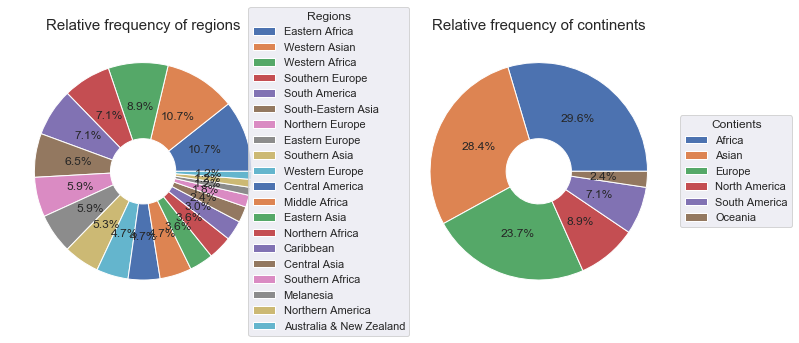

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

reg = df['region'].value_counts().index
reg_val = df['region'].value_counts().values

wedges, texts, autotexts = axs[0].pie(reg_val, autopct='%1.1f%%', wedgeprops=dict(width=0.7))
axs[0].legend(wedges, reg, title='Regions', loc='center right', bbox_to_anchor=(1, 0, .5, 1))
axs[0].set_title('Relative frequency of regions', fontsize=15)

con = df['continent'].value_counts().index
con_val = df['continent'].value_counts().values

wedges, texts, autotexts = axs[1].pie(con_val, autopct='%1.1f%%', wedgeprops=dict(width=0.7))
axs[1].legend(wedges, con, title='Contients', loc='center left', bbox_to_anchor=(1, 0, .5, 1))
axs[1].set_title('Relative frequency of continents', fontsize=15)

plt.savefig(charts_path + '\\rel_fre_cat.png', format='jpg', dpi=100)

# Numerical

In [23]:
def describe_numerical(df, stats):
    d = df.describe(include='number', percentiles=[.25, .5, .75, .90])
    d_plus = df[d.columns].agg(stats)
    return pd.concat([d, d_plus])

In [24]:
num_des = describe_numerical(df, ['sum'])

In [25]:
num_des.drop(['std', '25%', '75%'], inplace=True)

In [26]:
num_des

,total_cases,total_deaths,total_recovered,press_freedom_index_2020
count,1.690000e+02,169.00000,1.690000e+02,169.000000
mean,2.213106e+04,1530.52071,7.370467e+03,34.539882
min,3.000000e+00,0.00000,0.000000e+00,7.840000
50%,1.329000e+03,25.00000,4.680000e+02,31.620000
90%,3.057700e+04,1594.20000,1.286200e+04,55.346000
max,1.238052e+06,72284.00000,2.006690e+05,83.500000
sum,3.740149e+06,258658.00000,1.245609e+06,5837.240000


## Total_cases

In [93]:
def stats(group):
    return {'count': group.count(),
        'sum': group.sum(),
            'mean': group.mean(),
            'median': group.median(),
            'max': group.max(),
            'min': group.min()}

In [94]:
case_s = df['total_cases']
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000, 1500000])
labels = pd.cut(case_s, bins)
case_stat_t = case_s.groupby(labels).apply(stats).unstack()

In [95]:
case_stat_t

,count,sum,mean,median,max,min
total_cases,,,,,,
"(0, 10]",5.0,36.0,7.200000e+00,8.0,10.0,3.0
"(10, 100]",26.0,1183.0,4.550000e+01,37.5,99.0,11.0
"(100, 1000]",49.0,22941.0,4.681837e+02,471.0,900.0,101.0
"(1000, 10000]",50.0,190964.0,3.819280e+03,2842.5,9938.0,1022.0
"(10000, 100000]",29.0,777828.0,2.682166e+04,21983.0,82883.0,10004.0
"(100000, 1000000]",9.0,1509145.0,1.676828e+05,167007.0,250561.0,101650.0
"(1000000, 1500000]",1.0,1238052.0,1.238052e+06,1238052.0,1238052.0,1238052.0


In [34]:
case_s.mean()

22131.059171597633

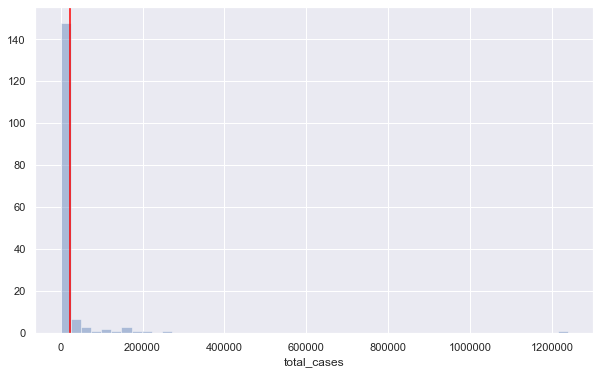

In [364]:
plt.figure(figsize=(10, 6))
sns.distplot(case_s, kde=False)
plt.axvline(case_s.mean(), color='red')
# plt.annotate(s=case_s.mean(), ())

## Total_deaths

In [365]:
death_s = df['total_deaths']

In [366]:
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000])

In [367]:
labels = pd.cut(death_s, bins)

In [368]:
grouped = death_s.groupby(labels)

In [370]:
grouped.apply(stats).unstack()

,count,sum,mean,median,max,min
total_deaths,,,,,,
"(0, 10]",46.0,241.0,5.239130,4.5,10.0,1.0
"(10, 100]",48.0,1950.0,40.625000,31.5,99.0,11.0
"(100, 1000]",34.0,11411.0,335.617647,256.5,895.0,102.0
"(1000, 10000]",17.0,62886.0,3699.176471,2854.0,8339.0,1074.0
"(10000, 100000]",5.0,182170.0,36434.000000,29315.0,72284.0,25531.0
"(100000, 1000000]",0.0,0.0,NaN,NaN,NaN,NaN


## Total_recovered

In [371]:
rec_s = df['total_recovered']

In [372]:
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000])

In [373]:
labels = pd.cut(rec_s, bins)

In [374]:
grouped = rec_s.groupby(labels)

In [375]:
def stats(group):
    return {'count': group.count(),
        'sum': group.sum(),
            'mean': group.mean(),
            'median': group.median(),
            'max': group.max(),
            'min': group.min()}

In [376]:
grouped.apply(stats).unstack()

,count,sum,mean,median,max,min
total_recovered,,,,,,
"(0, 10]",16.0,119.0,7.437500,8.0,10.0,1.0
"(10, 100]",32.0,1415.0,44.218750,37.5,93.0,11.0
"(100, 1000]",52.0,21888.0,420.923077,367.5,954.0,101.0
"(1000, 10000]",44.0,129310.0,2938.863636,2049.5,9333.0,1135.0
"(10000, 100000]",17.0,600090.0,35299.411765,21327.0,85231.0,10527.0
"(100000, 1000000]",3.0,492787.0,164262.333333,154718.0,200669.0,137400.0


## press_freedom_index_2019

In [35]:
press_s = df['press_freedom_index_2020']

In [36]:
bins = np.array([0, 12.61, 23.99, 34.35, 54.11, 100])

In [37]:
labels = pd.cut(press_s, bins)

In [38]:
grouped = press_s.groupby(labels)

In [39]:
def stats(group):
    return {'count': group.count(),
        'sum': group.sum(),
            'mean': group.mean(),
            'median': group.median(),
            'max': group.max(),
            'min': group.min()}

In [40]:
pfi_bins_f = grouped.apply(stats).unstack().reset_index().set_index(pd.Index(['Free', 'Upper Average', 'Average', 'Lower Average', 'Not Free']))

In [41]:
pfi_bins_f

,press_freedom_index_2020,count,sum,mean,median,max,min
Free,"(0.0, 12.61]",14.0,147.23,10.516429,10.575,12.61,7.84
Upper Average,"(12.61, 23.99]",30.0,632.08,21.069333,22.525,23.99,15.12
Average,"(23.99, 34.35]",58.0,1762.45,30.387069,29.970,34.34,25.91
Lower Average,"(34.35, 54.11]",46.0,1976.57,42.968913,43.080,54.11,35.06
Not Free,"(54.11, 100.0]",21.0,1318.91,62.805238,58.480,83.50,55.23


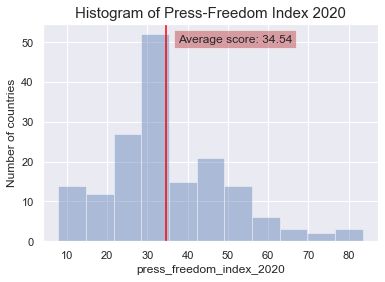

In [57]:
sns.distplot(press_s, kde=False)
plt.axvline(press_s.mean(), color='red')
plt.title('Histogram of Press-Freedom Index 2020', fontsize=15)
plt.text(s=('Average score: ' + str(round(press_s.mean(), 2))), x=press_s.mean()+3, y=50, bbox=dict(facecolor='r', alpha=.5))
plt.ylabel('Number of countries')
plt.savefig(charts_path + '\\his_pfi.jpg')

# Epidemic Status

In [59]:
epidemic_f = df[['total_cases', 'total_deaths', 'total_recovered', 'region', 'continent', 'country']]

In [60]:
epidemic_f = epidemic_f.set_index('country')

## by Country

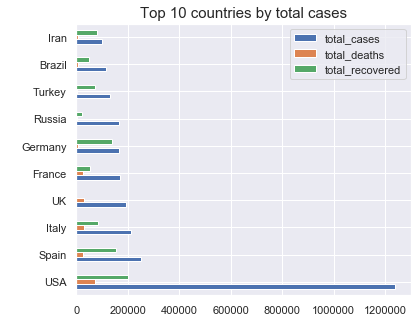

In [65]:
epidemic_f[['total_cases', 'total_deaths', 'total_recovered']].sort_values(by='total_cases', ascending=False)[:10].plot(kind='barh', figsize=(6, 5))
plt.title('Top 10 countries by total cases', fontsize=15)
plt.ylabel(' ')
plt.savefig(charts_path + '\\top_10_case.png')

### Total Cases 

In [66]:
epidemic_f['cases_rel_fre'] = (epidemic_f['total_cases'] / epidemic_f['total_cases'].sum()) * 100

In [67]:
epidemic_f['cases_cum_fre'] = epidemic_f['cases_rel_fre'].cumsum()

In [68]:
x = 80 
list_ = list(abs(epidemic_f['cases_cum_fre'] - x))
epidemic_f[:list_.index(min(list_))+1]

,total_cases,total_deaths,total_recovered,region,continent,cases_rel_fre,cases_cum_fre
country,,,,,,,
USA,1238052.0,72284.0,200669.0,Northern America,North America,33.101676,33.101676
Spain,250561.0,25613.0,154718.0,Southern Europe,Europe,6.699225,39.800901
Italy,213013.0,29315.0,85231.0,Southern Europe,Europe,5.695308,45.496209
UK,194990.0,29427.0,0.0,Northern Europe,Europe,5.213429,50.709638
France,170551.0,25531.0,52736.0,Western Europe,Europe,4.560005,55.269643
Germany,167007.0,6993.0,137400.0,Western Europe,Europe,4.465250,59.734893
Russia,165929.0,1537.0,21327.0,Eastern Europe,Europe,4.436428,64.171320
Turkey,129491.0,3520.0,73285.0,Western Asian,Asian,3.462188,67.633509
Brazil,115953.0,7958.0,48221.0,South America,South America,3.100224,70.733733


In [77]:
case_stat_t

,count,sum,mean,median,max,min
total_cases,,,,,,
"(0, 10]",5.0,36.0,7.200000e+00,8.0,10.0,3.0
"(10, 100]",26.0,1183.0,4.550000e+01,37.5,99.0,11.0
"(100, 1000]",49.0,22941.0,4.681837e+02,471.0,900.0,101.0
"(1000, 10000]",50.0,190964.0,3.819280e+03,2842.5,9938.0,1022.0
"(10000, 100000]",29.0,777828.0,2.682166e+04,21983.0,82883.0,10004.0
"(100000, 1000000]",9.0,1509145.0,1.676828e+05,167007.0,250561.0,101650.0
"(1000000, 1500000]",1.0,1238052.0,1.238052e+06,1238052.0,1238052.0,1238052.0


### Total Deaths

In [69]:
death_f = epidemic_f.sort_values(by='total_deaths', ascending=False)

In [70]:
death_f['deaths_rel_fre'] = (death_f['total_deaths'] / death_f['total_deaths'].sum()) * 100

In [71]:
death_f['deaths_cum_fre'] = death_f['deaths_rel_fre'].cumsum()

In [72]:
x = 80 
list_ = list(abs(death_f['deaths_cum_fre'] - x))
print(list_.index(min(list_)))
death_f[:list_.index(min(list_))+1]

7


,total_cases,total_deaths,total_recovered,region,continent,cases_rel_fre,cases_cum_fre,deaths_rel_fre,deaths_cum_fre
country,,,,,,,,,
USA,1238052.0,72284.0,200669.0,Northern America,North America,33.101676,33.101676,27.945782,27.945782
UK,194990.0,29427.0,0.0,Northern Europe,Europe,5.213429,50.709638,11.376799,39.322580
Italy,213013.0,29315.0,85231.0,Southern Europe,Europe,5.695308,45.496209,11.333498,50.656079
Spain,250561.0,25613.0,154718.0,Southern Europe,Europe,6.699225,39.800901,9.902265,60.558343
France,170551.0,25531.0,52736.0,Western Europe,Europe,4.560005,55.269643,9.870563,70.428906
Belgium,50781.0,8339.0,12731.0,Western Europe,Europe,1.357727,80.052854,3.223948,73.652854
Brazil,115953.0,7958.0,48221.0,South America,South America,3.100224,70.733733,3.076649,76.729504
Germany,167007.0,6993.0,137400.0,Western Europe,Europe,4.465250,59.734893,2.703570,79.433074


In [79]:
death_f.head()

,total_cases,total_deaths,total_recovered,region,continent,cases_rel_fre,cases_cum_fre,deaths_rel_fre,deaths_cum_fre
country,,,,,,,,,
USA,1238052.0,72284.0,200669.0,Northern America,North America,33.101676,33.101676,27.945782,27.945782
UK,194990.0,29427.0,0.0,Northern Europe,Europe,5.213429,50.709638,11.376799,39.322580
Italy,213013.0,29315.0,85231.0,Southern Europe,Europe,5.695308,45.496209,11.333498,50.656079
Spain,250561.0,25613.0,154718.0,Southern Europe,Europe,6.699225,39.800901,9.902265,60.558343
France,170551.0,25531.0,52736.0,Western Europe,Europe,4.560005,55.269643,9.870563,70.428906


In [96]:
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000, 1500000])
labels = pd.cut(death_f['total_cases'], bins)
grouped = death_f['total_deaths'].groupby(labels)
dea_gb_bins_case = pd.DataFrame(grouped.agg(np.sum))
case_stat_t = pd.merge(case_stat_t, dea_gb_bins_case, left_index=True, right_index=True)

In [97]:
case_stat_t

,count,sum,mean,median,max,min,total_deaths
total_cases,,,,,,,
"(0, 10]",5.0,36.0,7.200000e+00,8.0,10.0,3.0,2.0
"(10, 100]",26.0,1183.0,4.550000e+01,37.5,99.0,11.0,42.0
"(100, 1000]",49.0,22941.0,4.681837e+02,471.0,900.0,101.0,685.0
"(1000, 10000]",50.0,190964.0,3.819280e+03,2842.5,9938.0,1022.0,6280.0
"(10000, 100000]",29.0,777828.0,2.682166e+04,21983.0,82883.0,10004.0,43053.0
"(100000, 1000000]",9.0,1509145.0,1.676828e+05,167007.0,250561.0,101650.0,136312.0
"(1000000, 1500000]",1.0,1238052.0,1.238052e+06,1238052.0,1238052.0,1238052.0,72284.0


### Total Recovered

In [73]:
rec_f = epidemic_f.sort_values(by='total_recovered', ascending=False)

In [74]:
rec_f['rec_rel_fre'] = (rec_f['total_recovered'] / rec_f['total_recovered'].sum()) * 100

In [75]:
rec_f['rec_cum_fre'] = rec_f['rec_rel_fre'].cumsum()

In [76]:
x = 80 
list_ = list(abs(rec_f['rec_cum_fre'] - x))
print(list_.index(min(list_)))
rec_f[:list_.index(min(list_))+1]

12


,total_cases,total_deaths,total_recovered,region,continent,cases_rel_fre,cases_cum_fre,rec_rel_fre,rec_cum_fre
country,,,,,,,,,
USA,1238052.0,72284.0,200669.0,Northern America,North America,33.101676,33.101676,16.110112,16.110112
Spain,250561.0,25613.0,154718.0,Southern Europe,Europe,6.699225,39.800901,12.421073,28.531184
Germany,167007.0,6993.0,137400.0,Western Europe,Europe,4.465250,59.734893,11.030749,39.561933
Italy,213013.0,29315.0,85231.0,Southern Europe,Europe,5.695308,45.496209,6.842516,46.404450
Iran,101650.0,6418.0,81587.0,Southern Asia,Asian,2.717806,73.451539,6.549969,52.954418
China,82883.0,4633.0,77911.0,Eastern Asia,Asian,2.216035,75.667574,6.254852,59.209270
Turkey,129491.0,3520.0,73285.0,Western Asian,Asian,3.462188,67.633509,5.883467,65.092738
France,170551.0,25531.0,52736.0,Western Europe,Europe,4.560005,55.269643,4.233752,69.326490
Brazil,115953.0,7958.0,48221.0,South America,South America,3.100224,70.733733,3.871279,73.197769


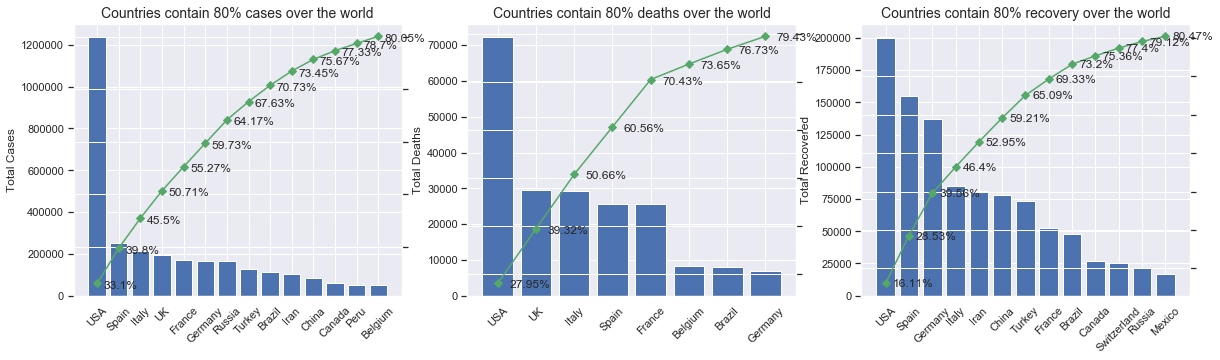

In [183]:
fig, axs = plt.subplots(ncols=3, nrows= 1, figsize=(20,5))

axs[0].bar(x=epidemic_f[:14].index, height=epidemic_f[:14]['total_cases'])
axs[0].set_xticklabels(labels, rotation=45)
axs[0].set_ylabel('Total Cases')
axs[0].set_title('Countries contain 80% cases over the world', fontsize=14)
ax1 = axs[0].twinx()
ax1.plot(epidemic_f[:14].index, epidemic_f[:14]['cases_cum_fre'], color='g', marker='D')
ax1.set_yticklabels(labels=" ")
for i, j in enumerate(epidemic_f[:14]['cases_cum_fre']):
    ax1.text(i+.3, j-1, s=str(round(j, 2))+'%')

axs[1].bar(x=death_f[:8].index, height=death_f[:8]['total_deaths'])
axs[1].set_xticklabels(labels, rotation=45)
axs[1].set_ylabel('Total Deaths')
axs[1].set_title('Countries contain 80% deaths over the world', fontsize=14)
ax2 = axs[1].twinx()
ax2.plot(death_f[:8].index, death_f[:8]['deaths_cum_fre'], color='g', marker='D')
ax2.set_yticklabels(labels=" ")
for i, j in enumerate(death_f[:8]['deaths_cum_fre']):
    ax2.text(i+.3, j-1, s=str(round(j, 2))+'%')    
    
axs[2].bar(x=rec_f[:13].index, height=rec_f[:13]['total_recovered'])
axs[2].set_xticklabels(labels, rotation=45)
axs[2].set_ylabel('Total Recovered')
axs[2].set_title('Countries contain 80% recovery over the world', fontsize=14)
ax3 = axs[2].twinx()
ax3.plot(rec_f[:13].index, rec_f[:13]['rec_cum_fre'], color='g', marker='D')
ax3.set_yticklabels(labels=" ")
for i, j in enumerate(rec_f[:13]['rec_cum_fre']):
    ax3.text(i+.3, j-1, s=str(round(j, 2))+'%')   
    
plt.savefig(charts_path + '\\cases_deaths_rec_pareto.png', bbox_inches='tight')

In [98]:
rec_f.head()

,total_cases,total_deaths,total_recovered,region,continent,cases_rel_fre,cases_cum_fre,rec_rel_fre,rec_cum_fre
country,,,,,,,,,
USA,1238052.0,72284.0,200669.0,Northern America,North America,33.101676,33.101676,16.110112,16.110112
Spain,250561.0,25613.0,154718.0,Southern Europe,Europe,6.699225,39.800901,12.421073,28.531184
Germany,167007.0,6993.0,137400.0,Western Europe,Europe,4.465250,59.734893,11.030749,39.561933
Italy,213013.0,29315.0,85231.0,Southern Europe,Europe,5.695308,45.496209,6.842516,46.404450
Iran,101650.0,6418.0,81587.0,Southern Asia,Asian,2.717806,73.451539,6.549969,52.954418


In [99]:
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000, 1500000])
labels = pd.cut(rec_f['total_cases'], bins)
grouped = rec_f['total_recovered'].groupby(labels)
rec_gb_bins_case = pd.DataFrame(grouped.agg(np.sum))
case_stat_t = pd.merge(case_stat_t, rec_gb_bins_case, left_index=True, right_index=True)

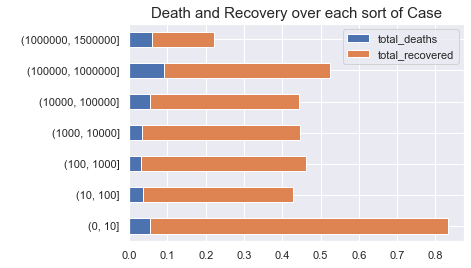

In [111]:
case_stat_t[['total_deaths', 'total_recovered']].div(case_stat_t['sum'], axis=0).plot(kind='barh', stacked=True)
plt.title('Death and Recovery over each sort of Case', fontsize=15)
plt.ylabel(' ')
plt.savefig(charts_path + '\\dea_rec_over_bins_case.jpg', bbox_inches='tight', quality=95)

## by Continent

In [112]:
grouped = epidemic_f.groupby('continent')

In [113]:
bucket_sum = grouped.sum()

In [114]:
bucket_sum

,total_cases,total_deaths,total_recovered,cases_rel_fre,cases_cum_fre
continent,,,,,
Africa,48853.0,1906.0,16408.0,1.306178,4972.771005
Asian,593198.0,20602.0,318632.0,15.860277,4571.146845
Europe,1503708.0,144375.0,571816.0,40.204495,3541.843868
North America,1347956.0,79635.0,249179.0,36.040168,1384.201030
Oceania,8389.0,118.0,7322.0,0.224296,395.475501
South America,238045.0,12022.0,82252.0,6.364586,1111.245007


In [121]:
mean_dea_con = bucket_sum['total_deaths'].mean() / bucket_sum['total_cases'].mean()

In [123]:
mean_rec_con = bucket_sum['total_recovered'].mean() / bucket_sum['total_cases'].mean()

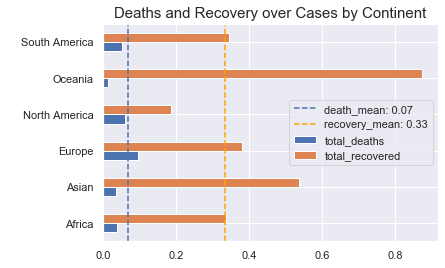

In [132]:
bucket_sum.div(bucket_sum['total_cases'], axis=0)[['total_deaths', 'total_recovered']].plot(kind='barh', stacked=False)
plt.title('Deaths and Recovery over Cases by Continent', fontsize=15)
plt.ylabel(' ')
plt.axvline(mean_dea_con, linestyle='--', label=('death_mean: ' + str(round(mean_dea_con, 2))))
plt.axvline(mean_rec_con, linestyle='--', c='orange',  label=('recovery_mean: ' + str(round(mean_rec_con, 2))))
plt.legend(loc='best')
plt.savefig(charts_path + '\\de_rec_over_case.jpg', bbox_inches='tight')

## by Region

In [133]:
grouped = epidemic_f.groupby('region')

In [134]:
bucket_sum = grouped.sum()

In [135]:
bucket_sum

,total_cases,total_deaths,total_recovered,cases_rel_fre,cases_cum_fre
region,,,,,
Australia & New Zealand,8363.0,118.0,7300.0,0.223601,195.478736
Caribbean,10855.0,452.0,3028.0,0.290229,493.967112
Central America,37003.0,2856.0,18489.0,0.989346,779.805751
Central Asia,7679.0,56.0,3469.0,0.205313,395.376387
Eastern Africa,4389.0,106.0,2036.0,0.117348,1797.813804
Eastern Asia,110463.0,5454.0,93024.0,2.953438,560.308560
Eastern Europe,245682.0,4431.0,45697.0,6.568776,921.089454
Melanesia,26.0,0.0,22.0,0.000695,199.996765
Middle Africa,4140.0,137.0,1241.0,0.110691,797.672900


In [136]:
mean_dea_reg = bucket_sum['total_deaths'].mean() / bucket_sum['total_cases'].mean()
mean_rec_reg = bucket_sum['total_recovered'].mean() / bucket_sum['total_cases'].mean()

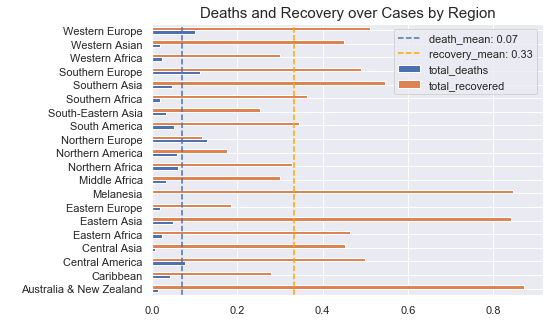

In [142]:
bucket_sum.div(bucket_sum['total_cases'], axis=0)[['total_deaths', 'total_recovered']].plot(kind='barh', figsize=(7, 5))
plt.title('Deaths and Recovery over Cases by Region', fontsize=15)
plt.ylabel(' ')
plt.axvline(mean_dea_con, linestyle='--', label=('death_mean: ' + str(round(mean_dea_con, 2))))
plt.axvline(mean_rec_con, linestyle='--', c='orange',  label=('recovery_mean: ' + str(round(mean_rec_con, 2))))
plt.legend(loc='best')
plt.savefig(charts_path + '\\de_rec_o_case_region.jpg', bbox_inches='tight')

# Press-Freedom index

In [144]:
press_f = df[['country', 'region', 'continent', 'press_freedom_index_2020']]

## by Country

### Top 10

In [152]:
press_top = press_f.set_index('country')[['press_freedom_index_2020', 'continent']].sort_values(by='press_freedom_index_2020')

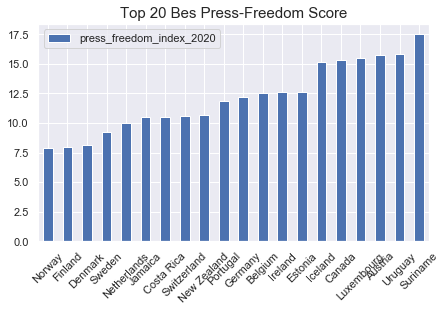

In [170]:
press_top[:20].plot(kind='bar', figsize=(7, 4))
plt.title('Top 20 Bes Press-Freedom Score', fontsize=15)
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.savefig(charts_path + '\\top20_pfi.jpg', bbox_inches='tight')

In [162]:
press_bottom = press_f.set_index('country')['press_freedom_index_2020'].sort_values(ascending=False)

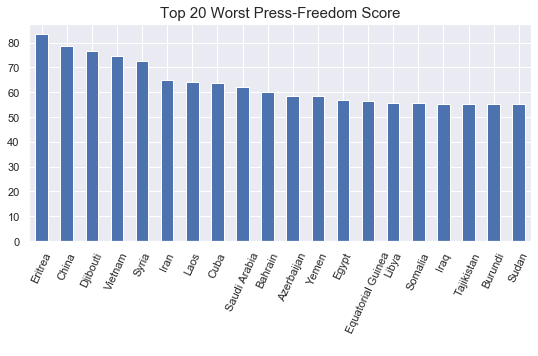

In [173]:
press_bottom[:20].plot(kind='bar', figsize=(9,4))
plt.title('Top 20 Worst Press-Freedom Score', fontsize=15)
plt.xticks(rotation=65)
plt.xlabel(' ')
plt.savefig(charts_path + '\\bottom20_pfi.jpg', bbox_inches='tight', dpi='figure')

### Difference range of score

In [263]:
bins = np.array([0, 12.61, 23.99, 34.35, 54.11, 100])
key_group = pd.cut(press_f['press_freedom_index_2020'], bins=bins)
press_bins_g = press_f['press_freedom_index_2020'].groupby(key_group)

In [264]:
press_bins_g.describe()

,count,mean,std,min,25%,50%,75%,max
press_freedom_index_2020,,,,,,,,
"(0.0, 12.61]",14.0,10.516429,1.729178,7.84,9.4275,10.575,12.0775,12.61
"(12.61, 23.99]",30.0,21.069333,3.058626,15.12,19.3175,22.525,23.5375,23.99
"(23.99, 34.35]",58.0,30.387069,2.208727,25.91,28.6900,29.970,32.4525,34.34
"(34.35, 54.11]",46.0,42.968913,5.200310,35.06,38.2000,43.080,45.5200,54.11
"(54.11, 100.0]",21.0,62.805238,9.000170,55.23,55.4500,58.480,64.8100,83.50


## by Continent

In [174]:
def stats(group):
    return {'count': group.count(),
            'mean': group.mean(),
            'median': group.median(),
            'max': group.max(),
            'min': group.min()}

In [175]:
press_con_f = press_f['press_freedom_index_2020'].groupby(press_f['continent']).apply(stats).unstack()

In [176]:
press_con_f

,count,mean,median,max,min
continent,,,,,
Africa,50.0,38.238600,34.230,83.50,19.25
Asian,48.0,44.080625,43.480,78.48,20.45
Europe,40.0,22.485750,22.795,49.75,7.84
North America,15.0,30.499333,29.700,63.81,10.51
Oceania,4.0,20.560000,22.070,27.41,10.69
South America,12.0,30.856667,31.780,45.66,15.79


### List of worst score countries by each continent

In [177]:
press_con_top_f = press_f.set_index(press_f['press_freedom_index_2020'].isin(press_con_f['max'])).loc[True].reset_index(drop=True)

In [178]:
press_con_top_f = pd.merge(press_con_top_f, press_con_f['mean'], left_on='continent', right_index=True)

In [179]:
press_con_top_f.set_index('continent', inplace=True)

In [180]:
press_con_f = pd.merge(press_con_f, press_con_top_f['country'], left_index=True, right_index=True)

### List of best score countries by each region

In [181]:
press_con_bottom_f = press_f.set_index(press_f['press_freedom_index_2020'].isin(press_con_f['min'])).loc[True].reset_index(drop=True)

In [182]:
press_con_bottom_f = pd.merge(press_con_bottom_f, press_con_f['mean'], left_on='continent', right_index=True)

In [183]:
press_con_bottom_f.set_index('continent', inplace=True)

In [184]:
press_con_f = pd.merge(press_con_f, press_con_bottom_f['country'], left_index=True, right_index=True)

In [185]:
press_con_f.rename(columns={'country_x': 'worst_country', 'country_y': 'best_country'}, inplace=True)

In [186]:
press_con_f.sort_values(by='mean', inplace=True)

In [187]:
press_con_f

,count,mean,median,max,min,worst_country,best_country
continent,,,,,,,
Oceania,4.0,20.560000,22.070,27.41,10.69,Fiji,New Zealand
Europe,40.0,22.485750,22.795,49.75,7.84,Belarus,Norway
North America,15.0,30.499333,29.700,63.81,10.51,Cuba,Jamaica
South America,12.0,30.856667,31.780,45.66,15.79,Venezuela,Uruguay
Africa,50.0,38.238600,34.230,83.50,19.25,Eritrea,Namibia
Asian,48.0,44.080625,43.480,78.48,20.45,China,Cyprus


### Visualization

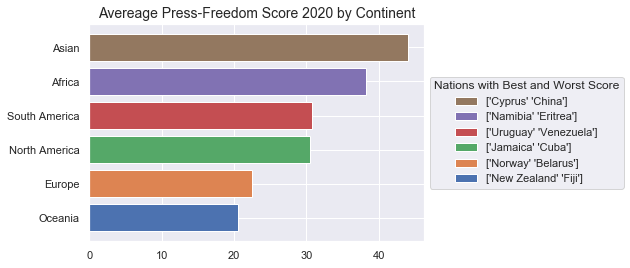

In [309]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

for i in press_con_f.index:
    ax.barh(data=press_con_f.loc[i], y=i, width='mean', label=press_con_f.loc[i][['best_country', 'worst_country']].values)

handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Nations with Best and Worst Score', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Avereage Press-Freedom Score 2020 by Continent', fontsize=14)
plt.savefig(charts_path + '\\pfi_con.jpg', bbox_inches='tight')

## by Region

In [189]:
press_reg_f = press_f['press_freedom_index_2020'].groupby(press_f['region']).apply(stats).unstack()

In [190]:
press_reg_f

,count,mean,median,max,min
region,,,,,
Australia & New Zealand,2.0,15.450000,15.450,20.21,10.69
Caribbean,5.0,31.128000,27.900,63.81,10.51
Central America,8.0,32.838750,32.760,48.20,10.53
Central Asia,4.0,48.177500,53.590,55.34,30.19
Eastern Africa,18.0,42.708333,38.625,83.50,27.68
Eastern Asia,6.0,35.736667,29.235,78.48,23.70
Eastern Europe,10.0,32.905000,31.000,49.75,22.67
Melanesia,2.0,25.670000,25.670,27.41,23.93
Middle Africa,8.0,42.375000,41.285,56.38,33.92


### List of worst score countries by each region

In [191]:
press_reg_top_f = press_f.set_index(press_f['press_freedom_index_2020'].isin(press_reg_f['max'])).loc[True].reset_index(drop=True)

In [192]:
press_reg_top_f = pd.merge(press_reg_top_f, press_reg_f['mean'], left_on='region', right_index=True)

In [193]:
press_reg_top_f.sort_values(by='mean', inplace=True, ignore_index=True)

In [194]:
press_reg_top_f.set_index('region', inplace=True)

In [195]:
press_reg_f = pd.merge(press_reg_f, press_reg_top_f['country'], left_index=True, right_index=True)

### List of best score countries by each region

In [196]:
press_reg_bottom_f = press_f.set_index(press_f['press_freedom_index_2020'].isin(press_reg_f['min'])).loc[True].reset_index(drop=True)

In [197]:
press_reg_bottom_f = pd.merge(press_reg_bottom_f, press_reg_f['mean'], left_on='region', right_index=True)

In [198]:
press_reg_bottom_f.sort_values(by='mean', ignore_index=True, inplace=True)

In [199]:
press_reg_bottom_f.set_index('region', inplace=True)

In [200]:
press_reg_f = pd.merge(press_reg_f, press_reg_bottom_f['country'], left_index=True, right_index=True)

In [201]:
press_reg_f.rename(columns={'country_x': 'worst_country', 'country_y': 'best_country'}, inplace=True)

In [203]:
press_reg_f.sort_values(by='mean', inplace=True)

### Visualization

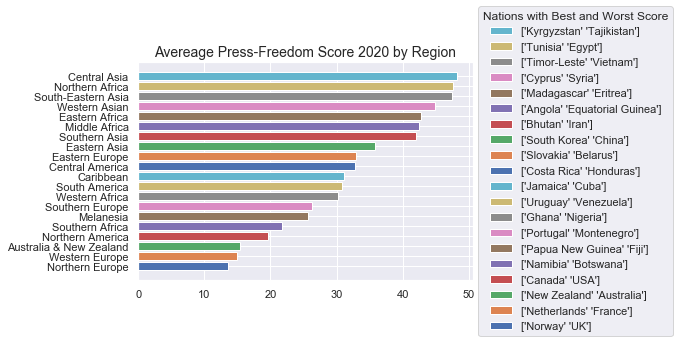

In [204]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

for i in press_reg_f.index:
    ax.barh(data=press_reg_f.loc[i], y=i, width='mean', label=press_reg_f.loc[i][['best_country', 'worst_country']].values)

handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Nations with Best and Worst Score', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Avereage Press-Freedom Score 2020 by Region', fontsize=14)
plt.savefig(charts_path + '\\pfi_reg.jpg', bbox_inches='tight')

# Relationship between Epidemic status and Press-Freedom index

In [206]:
world_cases = df['total_cases'].sum()

In [207]:
world_deaths = df['total_deaths'].sum()

In [208]:
world_recovered = df['total_recovered'].sum()

## Correlation with Top and Bottom Score

### Top Press_freedom index

In [209]:
top_20_index = press_top[:20].index.values

In [210]:
top_20_index_f = df[df['country'].isin(top_20_index)]

In [211]:
top_20_index_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
5,Germany,167007.0,6993.0,137400.0,12.16,Western Europe,Europe
11,Canada,62046.0,4043.0,26993.0,15.29,Northern America,North America
13,Belgium,50781.0,8339.0,12731.0,12.57,Western Europe,Europe
15,Netherlands,41087.0,5168.0,0.0,9.96,Western Europe,Europe
18,Switzerland,30009.0,1795.0,25400.0,10.62,Western Europe,Europe


In [212]:
case_top = top_20_index_f['total_cases'].sum()

In [213]:
death_top = top_20_index_f['total_deaths'].sum()

In [214]:
rec_top = top_20_index_f['total_recovered'].sum()

In [215]:
mean_score_top = top_20_index_f['press_freedom_index_2020'].mean()

In [418]:
top_20_index_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(top_20_index_f['press_freedom_index_2020'])

total_cases        0.005749
total_deaths      -0.041776
total_recovered    0.046102
dtype: float64

### Bottom Press_freedom_index

In [216]:
bottom_20_index = press_bottom[:20].index.values

In [217]:
bottom_20_index_f = df[df['country'].isin(bottom_20_index)]

In [218]:
bottom_20_index_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
9,Iran,101650.0,6418.0,81587.0,64.81,Southern Asia,Asian
10,China,82883.0,4633.0,77911.0,78.48,Eastern Asia,Asian
17,Saudi Arabia,30251.0,200.0,5431.0,62.14,Western Asian,Asian
47,Egypt,7201.0,452.0,1730.0,56.82,Northern Africa,Africa
58,Bahrain,3720.0,8.0,1762.0,60.13,Western Asian,Asian


In [219]:
case_bottom = bottom_20_index_f['total_cases'].sum()

In [220]:
death_bottom = bottom_20_index_f['total_deaths'].sum()

In [221]:
rec_bottom = bottom_20_index_f['total_recovered'].sum()

In [222]:
mean_score_bottom = bottom_20_index_f['press_freedom_index_2020'].mean()

In [419]:
bottom_20_index_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(bottom_20_index_f['press_freedom_index_2020'])

total_cases        0.268829
total_deaths       0.259914
total_recovered    0.309179
dtype: float64

### Visualization

In [224]:
data = {'total_cases': [case_top, case_bottom, (world_cases - (case_top + case_bottom))],
 'total_deaths': [death_top, death_bottom, (world_deaths - (death_top + death_bottom))],
 'total_recovered': [rec_top, rec_bottom, (world_recovered - (rec_top + rec_bottom))],
 'mean_pfi_score': [mean_score_top, mean_score_bottom, np.nan]}

In [225]:
top_bottom_f = pd.DataFrame(data=data, index=['top_20', 'bottom_20', 'the_rest'])

In [226]:
top_bottom_f

,total_cases,total_deaths,total_recovered,mean_pfi_score
top_20,471729.0,33392.0,253865.0,12.1085
bottom_20,235695.0,12012.0,173687.0,63.1840
the_rest,3032725.0,213254.0,818057.0,NaN


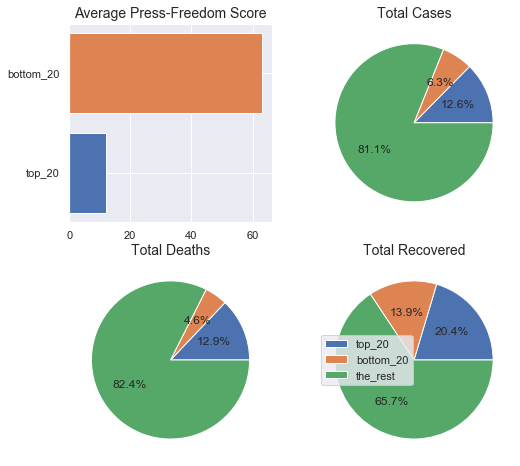

In [258]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axs[0, 0].barh(y=top_bottom_f.index[0], width=top_bottom_f['mean_pfi_score'][0])
axs[0, 0].barh(y=top_bottom_f.index[1], width=top_bottom_f['mean_pfi_score'][1], color='C1')
axs[0, 0].set_title('Average Press-Freedom Score', fontsize=14)

wedges, _, _ = axs[0, 1].pie(top_bottom_f['total_cases'], autopct='%1.1f%%' )
axs[0, 1].set_title('Total Cases', fontsize=14)

wedges, _, _ = axs[1, 0].pie(top_bottom_f['total_deaths'], autopct='%1.1f%%' )
axs[1, 0].set_title('Total Deaths', fontsize=14)

wedges, _, _ = axs[1, 1].pie(top_bottom_f['total_recovered'], autopct='%1.1f%%' )
axs[1, 1].legend(wedges, top_bottom_f.index, loc="center left")
axs[1, 1].set_title('Total Recovered', fontsize=14)

plt.savefig(charts_path + '\\corr_top_bot_pfi.jpg')

## Epidemic status at different range of index score

In [266]:
def stats(group):
    return {'count': group.count(),
            'mean': group.mean()}

In [311]:
bins = np.array([0, 12.61, 23.99, 34.35, 54.11, 100])
key_group = pd.cut(press_f['press_freedom_index_2020'], bins=bins)
press_bins_g = press_f['press_freedom_index_2020'].groupby(key_group)

In [312]:
press_bins_f = press_bins_g.apply(stats).unstack()

In [313]:
press_bins_f.reset_index(inplace=True)

In [314]:
press_bins_f.set_index(pd.Index(['free', 'upper_average', 'average', 'lower_average', 'not_free']), inplace=True)

In [315]:
press_bins_f

,press_freedom_index_2020,count,mean
free,"(0.0, 12.61]",14.0,10.516429
upper_average,"(12.61, 23.99]",30.0,21.069333
average,"(23.99, 34.35]",58.0,30.387069
lower_average,"(34.35, 54.11]",46.0,42.968913
not_free,"(54.11, 100.0]",21.0,62.805238


### Free

In [275]:
press_bin_1_f = df[(df['press_freedom_index_2020'] >=0) & (df['press_freedom_index_2020'] <=12.61)]

In [276]:
press_bin_1_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
5,Germany,167007.0,6993.0,137400.0,12.16,Western Europe,Europe
13,Belgium,50781.0,8339.0,12731.0,12.57,Western Europe,Europe
15,Netherlands,41087.0,5168.0,0.0,9.96,Western Europe,Europe
18,Switzerland,30009.0,1795.0,25400.0,10.62,Western Europe,Europe
20,Portugal,25702.0,1074.0,1743.0,11.83,Southern Europe,Europe


In [277]:
case_bin_1 = press_bin_1_f['total_cases'].sum()

In [278]:
death_bin_1 = press_bin_1_f['total_deaths'].sum()

In [279]:
rec_bin_1 = press_bin_1_f['total_recovered'].sum()

In [412]:
press_bin_1_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(press_bin_1_f['press_freedom_index_2020'])

total_cases        0.364551
total_deaths       0.385940
total_recovered    0.313457
dtype: float64

### Upper Average

In [280]:
press_bin_2_f = df[(df['press_freedom_index_2020'] >12.61) & (df['press_freedom_index_2020'] <=23.99)]

In [281]:
press_bin_2_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
0,USA,1238052.0,72284.0,200669.0,23.85,Northern America,North America
1,Spain,250561.0,25613.0,154718.0,22.16,Southern Europe,Europe
2,Italy,213013.0,29315.0,85231.0,23.69,Southern Europe,Europe
3,UK,194990.0,29427.0,0.0,22.93,Northern Europe,Europe
4,France,170551.0,25531.0,52736.0,22.92,Western Europe,Europe


In [282]:
case_bin_2 = press_bin_2_f['total_cases'].sum()

In [283]:
death_bin_2 = press_bin_2_f['total_deaths'].sum()

In [284]:
rec_bin_2 = press_bin_2_f['total_recovered'].sum()

In [413]:
press_bin_2_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(press_bin_2_f['press_freedom_index_2020'])

total_cases        0.221342
total_deaths       0.275576
total_recovered    0.197331
dtype: float64

### Average

In [285]:
press_bin_3_f = df[(df['press_freedom_index_2020'] >23.99) & (df['press_freedom_index_2020'] <=34.35)]

In [286]:
press_bin_3_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
8,Brazil,115953.0,7958.0,48221.0,34.05,South America,South America
12,Peru,51189.0,1444.0,15413.0,30.94,South America,South America
16,Ecuador,31881.0,1569.0,3433.0,32.62,South America,South America
23,Chile,22016.0,275.0,10710.0,27.31,South America,South America
28,Israel,16314.0,238.0,10527.0,30.84,Western Asian,Asian


In [287]:
case_bin_3 = press_bin_3_f['total_cases'].sum()

In [288]:
death_bin_3 = press_bin_3_f['total_deaths'].sum()

In [289]:
rec_bin_3 = press_bin_3_f['total_recovered'].sum()

In [414]:
press_bin_3_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(press_bin_3_f['press_freedom_index_2020'])

total_cases        0.183282
total_deaths       0.196623
total_recovered    0.159994
dtype: float64

### Lower Average

In [290]:
press_bin_4_f = df[(df['press_freedom_index_2020'] >34.35) & (df['press_freedom_index_2020'] <=54.11)]

In [291]:
press_bin_4_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
6,Russia,165929.0,1537.0,21327.0,48.92,Eastern Europe,Europe
7,Turkey,129491.0,3520.0,73285.0,50.02,Western Asian,Asian
14,India,49436.0,1695.0,14183.0,45.33,Southern Asia,Asian
19,Mexico,26025.0,2507.0,16810.0,45.45,Central America,North America
22,Pakistan,22550.0,526.0,6217.0,45.52,Southern Asia,Asian


In [292]:
case_bin_4 = press_bin_4_f['total_cases'].sum()

In [293]:
death_bin_4 = press_bin_4_f['total_deaths'].sum()

In [294]:
rec_bin_4 = press_bin_4_f['total_recovered'].sum()

In [415]:
press_bin_4_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(press_bin_4_f['press_freedom_index_2020'])

total_cases        0.314428
total_deaths       0.255200
total_recovered    0.296152
dtype: float64

### Not Free

In [297]:
press_bin_5_f = df[(df['press_freedom_index_2020'] >54.11)]

In [298]:
press_bin_5_f.head()

,country,total_cases,total_deaths,total_recovered,press_freedom_index_2020,region,continent
9,Iran,101650.0,6418.0,81587.0,64.81,Southern Asia,Asian
10,China,82883.0,4633.0,77911.0,78.48,Eastern Asia,Asian
17,Saudi Arabia,30251.0,200.0,5431.0,62.14,Western Asian,Asian
25,Singapore,20198.0,18.0,1519.0,55.23,South-Eastern Asia,Asian
47,Egypt,7201.0,452.0,1730.0,56.82,Northern Africa,Africa


In [300]:
case_bin_5 = press_bin_5_f['total_cases'].sum()

In [301]:
death_bin_5 = press_bin_5_f['total_deaths'].sum()

In [302]:
rec_bin_5 = press_bin_5_f['total_recovered'].sum()

In [416]:
press_bin_5_f[['total_cases', 'total_deaths', 'total_recovered']].corrwith(press_bin_5_f['press_freedom_index_2020'])

total_cases        0.250485
total_deaths       0.268947
total_recovered    0.315400
dtype: float64

### Visualization

In [303]:
total_cases = [case_bin_1, case_bin_2, case_bin_3, case_bin_4, case_bin_5]

In [304]:
total_deaths = [death_bin_1, death_bin_2, death_bin_3, death_bin_4, death_bin_5]

In [305]:
total_recovery = [rec_bin_1, rec_bin_2, rec_bin_3, rec_bin_4, rec_bin_5]

In [306]:
data = {'total_cases': total_cases,
             'total_deaths': total_deaths,
             'total_recovered': total_recovery}

In [307]:
x = pd.DataFrame(data, index=press_bins_f.index.values)

In [316]:
press_bins_f = pd.merge(press_bins_f, x, left_index=True, right_index=True)

In [317]:
press_bins_f

,press_freedom_index_2020,count,mean,total_cases,total_deaths,total_recovered
free,"(0.0, 12.61]",14.0,10.516429,387680.0,28617.0,207611.0
upper_average,"(12.61, 23.99]",30.0,21.069333,2196622.0,188046.0,566521.0
average,"(23.99, 34.35]",58.0,30.387069,369302.0,16352.0,132447.0
lower_average,"(34.35, 54.11]",46.0,42.968913,530652.0,13613.0,163824.0
not_free,"(54.11, 100.0]",21.0,62.805238,255893.0,12030.0,175206.0


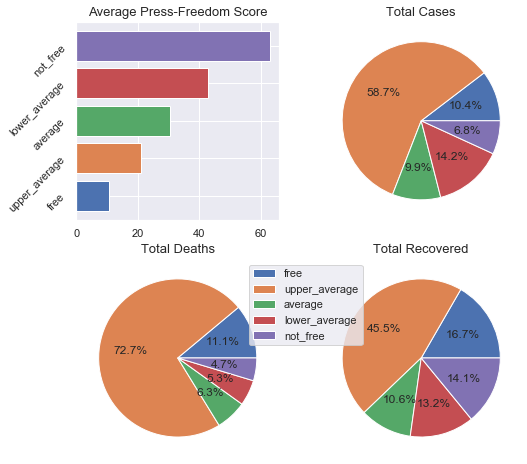

In [341]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))

axs[0, 0].barh(y=press_bins_f.index[0], width=press_bins_f['mean'][0])
axs[0, 0].barh(y=press_bins_f.index[1], width=press_bins_f['mean'][1])
axs[0, 0].barh(y=press_bins_f.index[2], width=press_bins_f['mean'][2])
axs[0, 0].barh(y=press_bins_f.index[3], width=press_bins_f['mean'][3])
axs[0, 0].barh(y=press_bins_f.index[4], width=press_bins_f['mean'][4])
axs[0, 0].set_title('Average Press-Freedom Score', fontsize= 13)
axs[0, 0].set_yticklabels(labels= press_bins_f.index,rotation=45)

wedges, _, _ = axs[0, 1].pie(press_bins_f['total_cases'], autopct='%1.1f%%')
axs[0, 1].set_title('Total Cases', fontsize= 13)

wedges, _, _ = axs[1, 0].pie(press_bins_f['total_deaths'], autopct='%1.1f%%')
axs[1, 0].set_title('Total Deaths', fontsize= 13)

wedges, _, _ = axs[1, 1].pie(press_bins_f['total_recovered'], autopct='%1.1f%%')
axs[1, 1].set_title('Total Recovered', fontsize= 13)
axs[1, 1].legend(wedges, press_bins_f.index, loc="upper left", bbox_to_anchor=(-0.4, 0.5, -0.5, 0.5))

plt.savefig(charts_path + '\\dist_epi_pri.jpg')

## by Continent

In [351]:
epi_reg_f = pd.DataFrame()
for i in press_con_f.index.values:
    x = pd.DataFrame(map(lambda x: x.sum() , [df[df['continent'] == i][j] for j in [['total_cases', 'total_deaths', 'total_recovered']]]), index=[i])
    epi_reg_f = epi_reg_f.append(x)

In [354]:
pfi_epi_con_f = pd.merge(press_con_f, epi_reg_f, left_index=True, right_index=True)

In [356]:
pfi_epi_con_f.sort_values(by='mean', inplace=True)

In [357]:
pfi_epi_con_f

,count,mean,median,max,min,worst_country,best_country,total_cases,total_deaths,total_recovered
Oceania,4.0,20.560000,22.070,27.41,10.69,Fiji,New Zealand,8389.0,118.0,7322.0
Europe,40.0,22.485750,22.795,49.75,7.84,Belarus,Norway,1503708.0,144375.0,571816.0
North America,15.0,30.499333,29.700,63.81,10.51,Cuba,Jamaica,1347956.0,79635.0,249179.0
South America,12.0,30.856667,31.780,45.66,15.79,Venezuela,Uruguay,238045.0,12022.0,82252.0
Africa,50.0,38.238600,34.230,83.50,19.25,Eritrea,Namibia,48853.0,1906.0,16408.0
Asian,48.0,44.080625,43.480,78.48,20.45,China,Cyprus,593198.0,20602.0,318632.0


### Visualization

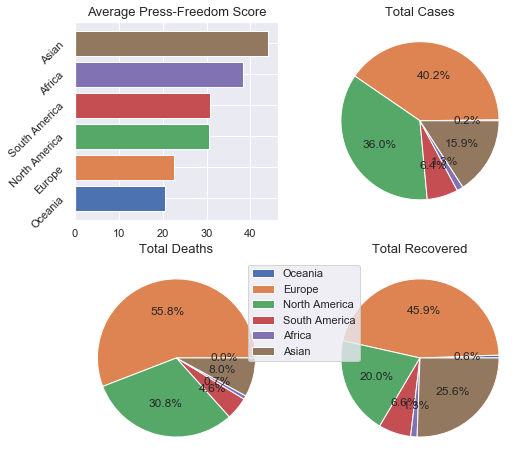

In [396]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))

for i in pfi_epi_con_f.index.values:
    axs[0, 0].barh(y=i, width=pfi_epi_con_f.loc[i]['mean'])
# axs[0, 0].barh(y=pfi_epi_con_f.index[1], width=pfi_epi_con_f['mean'][1])
# axs[0, 0].barh(y=pfi_epi_con_f.index[2], width=pfi_epi_con_f['mean'][2])
# axs[0, 0].barh(y=pfi_epi_con_f.index[3], width=pfi_epi_con_f['mean'][3])
# axs[0, 0].barh(y=pfi_epi_con_f.index[4], width=pfi_epi_con_f['mean'][4])
axs[0, 0].set_title('Average Press-Freedom Score', fontsize= 13)
axs[0, 0].set_yticklabels(labels= pfi_epi_con_f.index,rotation=45)

wedges, _, _ = axs[0, 1].pie(pfi_epi_con_f['total_cases'], autopct='%1.1f%%')
axs[0, 1].set_title('Total Cases', fontsize= 13)

wedges, _, _ = axs[1, 0].pie(pfi_epi_con_f['total_deaths'], autopct='%1.1f%%')
axs[1, 0].set_title('Total Deaths', fontsize= 13)

wedges, _, _ = axs[1, 1].pie(pfi_epi_con_f['total_recovered'], autopct='%1.1f%%')
axs[1, 1].set_title('Total Recovered', fontsize= 13)
axs[1, 1].legend(wedges, pfi_epi_con_f.index, loc="upper left", bbox_to_anchor=(-0.4, 0.5, -0.5, 0.5))

plt.savefig(charts_path + '\\dist_epi_pri_con.jpg')

## by Region

In [360]:
epi_reg_f = pd.DataFrame()
for i in press_reg_f.index.values:
    x = pd.DataFrame(map(lambda x: x.sum(), [df[df['region'] == i][j] for j in [['total_cases', 'total_deaths', 'total_recovered']]]), index=[i])
    epi_reg_f = epi_reg_f.append(x)

In [361]:
press_reg_f = pd.merge(press_reg_f, epi_reg_f, left_index=True, right_index=True)

In [364]:
press_reg_f.sort_values(by='mean', inplace=True)

In [365]:
press_reg_f

,count,mean,median,max,min,worst_country,best_country,total_cases,total_deaths,total_recovered
Northern Europe,10.0,13.616000,12.605,22.93,7.84,UK,Norway,269495.0,34714.0,31467.0
Western Europe,8.0,14.873750,14.015,22.92,9.96,France,Netherlands,479041.0,48531.0,245373.0
Australia & New Zealand,2.0,15.450000,15.450,20.21,10.69,Australia,New Zealand,8363.0,118.0,7300.0
Northern America,2.0,19.570000,19.570,23.85,15.29,USA,Canada,1300098.0,76327.0,227662.0
Southern Africa,3.0,21.740000,22.410,23.56,19.25,Botswana,Namibia,7611.0,149.0,2762.0
Melanesia,2.0,25.670000,25.670,27.41,23.93,Fiji,Papua New Guinea,26.0,0.0,22.0
Southern Europe,12.0,26.269167,28.510,33.83,11.83,Montenegro,Portugal,509490.0,56699.0,249279.0
Western Africa,15.0,30.212667,30.620,35.63,22.26,Nigeria,Ghana,13429.0,319.0,4027.0
South America,12.0,30.856667,31.780,45.66,15.79,Venezuela,Uruguay,238045.0,12022.0,82252.0
Caribbean,5.0,31.128000,27.900,63.81,10.51,Cuba,Jamaica,10855.0,452.0,3028.0


### Visualization

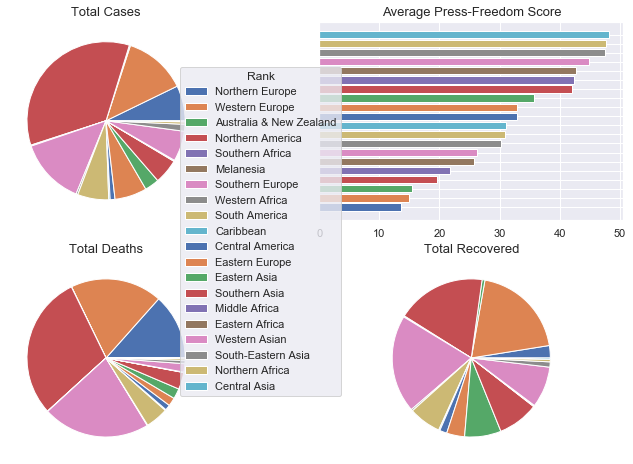

In [395]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

for i in press_reg_f.index.values:
    axs[0, 1].barh(y=i, width=press_reg_f.loc[i]['mean'])
# axs[0, 0].barh(y=press_reg_f.index[1], width=press_reg_f['mean'][1])
# axs[0, 0].barh(y=press_reg_f.index[2], width=press_reg_f['mean'][2])
# axs[0, 0].barh(y=press_reg_f.index[3], width=press_reg_f['mean'][3])
# axs[0, 0].barh(y=press_reg_f.index[4], width=press_reg_f['mean'][4])
axs[0, 1].set_title('Average Press-Freedom Score', fontsize= 13)
axs[0, 1].set_yticklabels(labels=' ')

wedges, _, = axs[0, 0].pie(press_reg_f['total_cases'])
axs[0, 0].set_title('Total Cases', fontsize= 13)

wedges, _, = axs[1, 0].pie(press_reg_f['total_deaths'])
axs[1, 0].set_title('Total Deaths', fontsize= 13)

wedges, _, = axs[1, 1].pie(press_reg_f['total_recovered'])
axs[1, 1].set_title('Total Recovered', fontsize= 13)
axs[1, 1].legend(wedges, press_reg_f.index, loc="upper left", bbox_to_anchor=(-1, 0.5, -1, 1.5), title='Rank')

plt.savefig(charts_path + '\\dist_epi_pri_reg.jpg')